<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/2_ML_R%C3%A9gression_lin%C3%A9aire_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
# Complete x, y and z in the script below:
px.scatter_3d(x = 'MAX_TEMPERATURE_C', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather, color='SUNHOUR')


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a new column 'predict'.**

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression

#VARIABLES
X = df_weather[['SUNHOUR', 'MIN_TEMPERATURE_C' ]] 
y = df_weather['MAX_TEMPERATURE_C'] 

#CALCUL LinearRegression
modelLR = LinearRegression().fit(X, y)

#the result of the prediction 
modelLR.predict(df_weather[['SUNHOUR', 'MIN_TEMPERATURE_C' ]])

#ADD column in dataframe
df_weather['PREDICT'] = modelLR.predict(df_weather[['SUNHOUR', 'MIN_TEMPERATURE_C' ]])

#Visualize df for check
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [ ]:
# Your code here :

px.scatter_3d(x = 'PREDICT', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather, color='SUNHOUR')

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

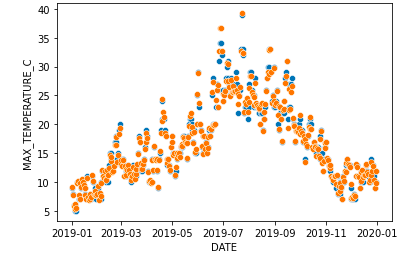

In [ ]:
#new column predict2

#VARIABLES
X = df_weather[['SUNHOUR','MIN_TEMPERATURE_C']] 
y = df_weather['MAX_TEMPERATURE_C'] 

#CALCUL LinearRegression
modelLR2 = LinearRegression().fit(X, y)

#the result of the prediction 
modelLR2.predict(df_weather[['SUNHOUR','MIN_TEMPERATURE_C']])

#ADD column in dataframe
df_weather['PREDICT2'] = modelLR2.predict(df_weather[['SUNHOUR','MIN_TEMPERATURE_C']])

#Visualize df for check
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

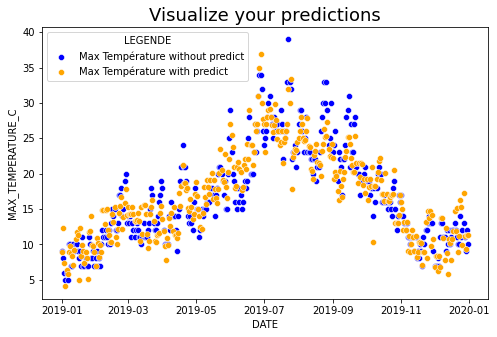

In [ ]:
#Scatterplot

plt.figure(figsize=(8,5))

sns.scatterplot(x= pd.to_datetime(df_weather['DATE']), y='MAX_TEMPERATURE_C', data= df_weather, color='blue', label = 'Max Température without predict')
sns.scatterplot(x= pd.to_datetime(df_weather['DATE']), y='PREDICT2', data= df_weather, color='orange', label = 'Max Température with predict')
plt.legend(title = 'LEGENDE' )
plt.title('Visualize your predictions', size=18)
plt.show()


You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather[['SUNHOUR','MIN_TEMPERATURE_C']] 
y = df_weather['MAX_TEMPERATURE_C'] 



In [ ]:
# We train a "model" with "fit" function. This model will store coefficients after training.
model = LinearRegression().fit(X, y)


In [ ]:
# We can print coefficients :
model.coef_

#Which column has the biggest coefficient ? It's MIN_TEMPERATURE_C

array([0.66222402, 0.98867383])